In [9]:
from math import ceil

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import MDS
from ucimlrepo import fetch_ucirepo

TARGET_VARIABLE = "Concrete compressive strength"


def perform_mds(data: pd.DataFrame, normalize: bool, runs: int, columns: int = 5) -> MDS:
    data = (data - data.mean()) / data.std() if normalize else data
    x = data.drop(columns=[TARGET_VARIABLE])
    y = data[TARGET_VARIABLE]

    plt.figure(figsize=(20, 8))
    plt.title("Multidimensional Scaling", fontsize=16)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False,
    )
    plt.grid(False)
    _mds = None

    for i in range(runs):
        _mds = MDS(n_components=2, random_state=i, n_jobs=-1)
        output_2d = _mds.fit_transform(x)

        plt.subplot(int(ceil(runs / columns)), columns, i + 1)
        plt.scatter(output_2d[:, 0], output_2d[:, 1], c=y, cmap="RdYlGn", alpha=0.5)
        plt.tick_params(
            axis="both",
            which="both",
            bottom=False,
            top=False,
            left=False,
            right=False,
            labelbottom=False,
            labelleft=False,
        )

    plt.tight_layout()
    plt.subplots_adjust(right=0.89)
    cax = plt.axes((0.9, 0.1, 0.02, 0.8))
    cb = plt.colorbar(cax=cax)
    cb.set_label(TARGET_VARIABLE, fontsize=12)
    cb.ax.yaxis.set_ticks([])

    plt.show()
    return _mds

In [10]:
concrete_compressive_strength = fetch_ucirepo(id=165)
concrete_compressive_strength.variables

,name,role,type,demographic,description,units,missing_values
0,Cement,Feature,Continuous,None,None,kg/m^3,no
1,Blast Furnace Slag,Feature,Integer,None,None,kg/m^3,no
2,Fly Ash,Feature,Continuous,None,None,kg/m^3,no
3,Water,Feature,Continuous,None,None,kg/m^3,no
4,Superplasticizer,Feature,Continuous,None,None,kg/m^3,no
5,Coarse Aggregate,Feature,Continuous,None,None,kg/m^3,no
6,Fine Aggregate,Feature,Continuous,None,None,kg/m^3,no
7,Age,Feature,Integer,None,None,day,no
8,Concrete compressive strength,Target,Continuous,None,None,MPa,no


In [11]:
features = concrete_compressive_strength.data.features
targets = concrete_compressive_strength.data.targets
dataset = pd.concat([features, targets], axis=1)
dataset.describe().round(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


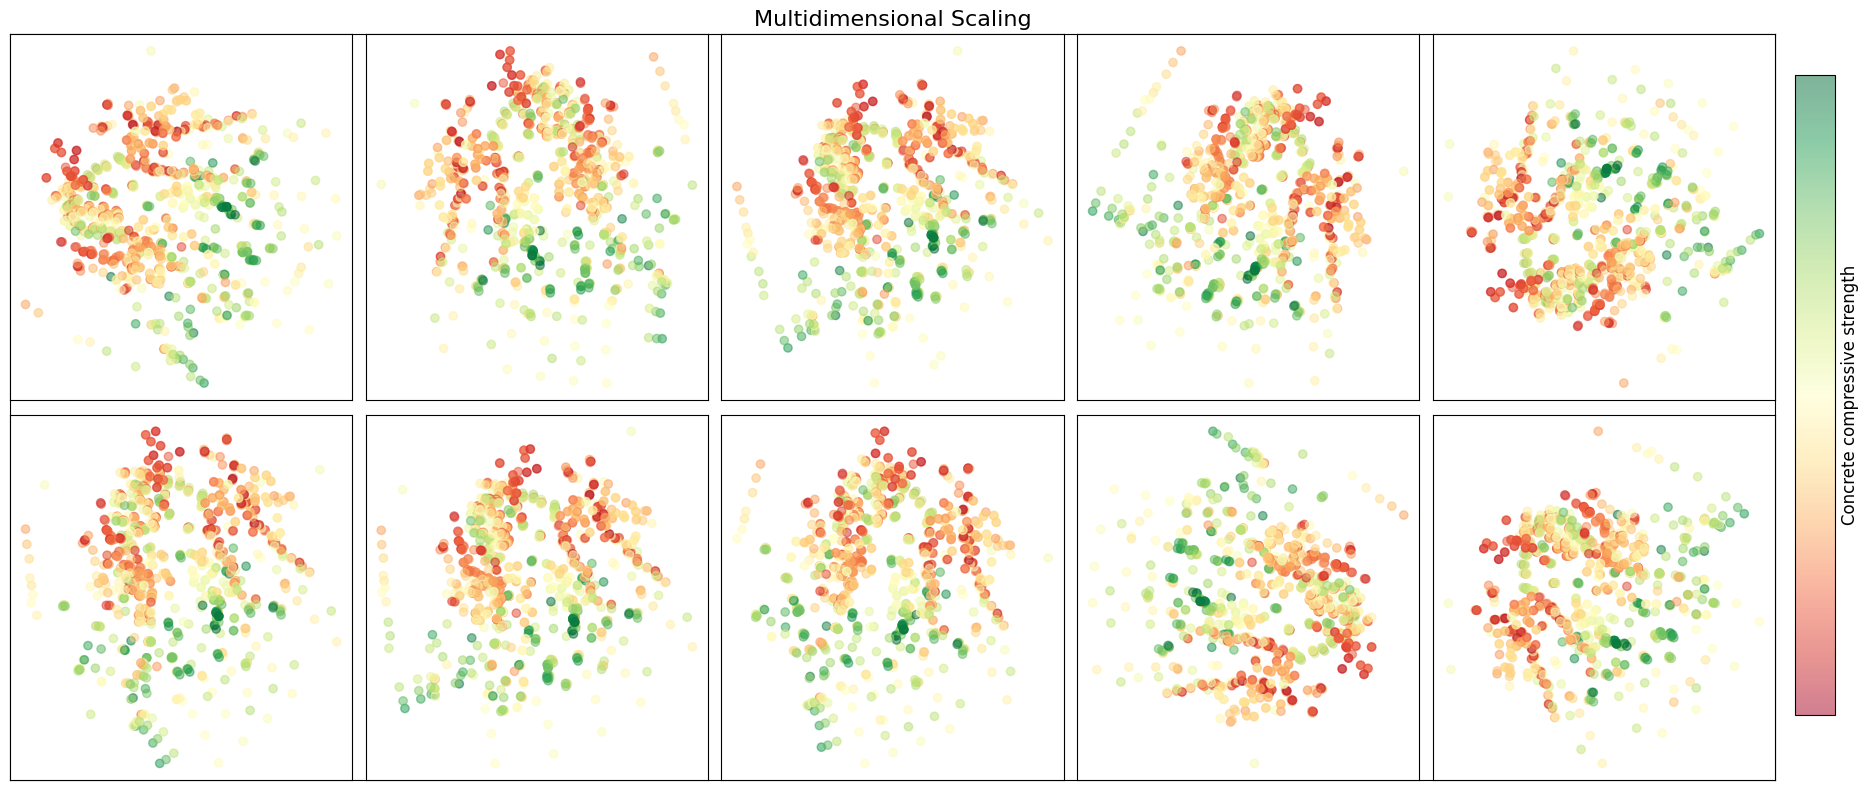

In [12]:
mds1 = perform_mds(dataset, normalize=False, runs=10)

In [13]:
mds1.dissimilarity_matrix_

array([[  0.        ,  15.        , 380.36397043, ..., 466.96443119,
        442.14326864, 365.73982556],
       [ 15.        ,   0.        , 384.89186793, ..., 471.92031107,
        444.10321998, 373.1696933 ],
       [380.36397043, 384.89186793,   0.        , ..., 376.39212266,
        367.10001362, 324.0720136 ],
       ...,
       [466.96443119, 471.92031107, 376.39212266, ...,   0.        ,
        154.88741072, 127.49266646],
       [442.14326864, 444.10321998, 367.10001362, ..., 154.88741072,
          0.        , 202.37991501],
       [365.73982556, 373.1696933 , 324.0720136 , ..., 127.49266646,
        202.37991501,   0.        ]])

In [14]:
mds1.embedding_

array([[ 295.82483701,   82.5965747 ],
       [ 297.00097638,   92.71293958],
       [ 140.98310551, -291.57853646],
       ...,
       [-166.71594703,  -61.3271384 ],
       [-132.38882471, -104.7322529 ],
       [ -19.22187711,  -67.56840348]])

In [15]:
mds1.feature_names_in_

array(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype=object)

In [16]:
mds1.n_features_in_

8

In [17]:
mds1.n_iter_

300

In [18]:
mds1.stress_

2060723223.916871

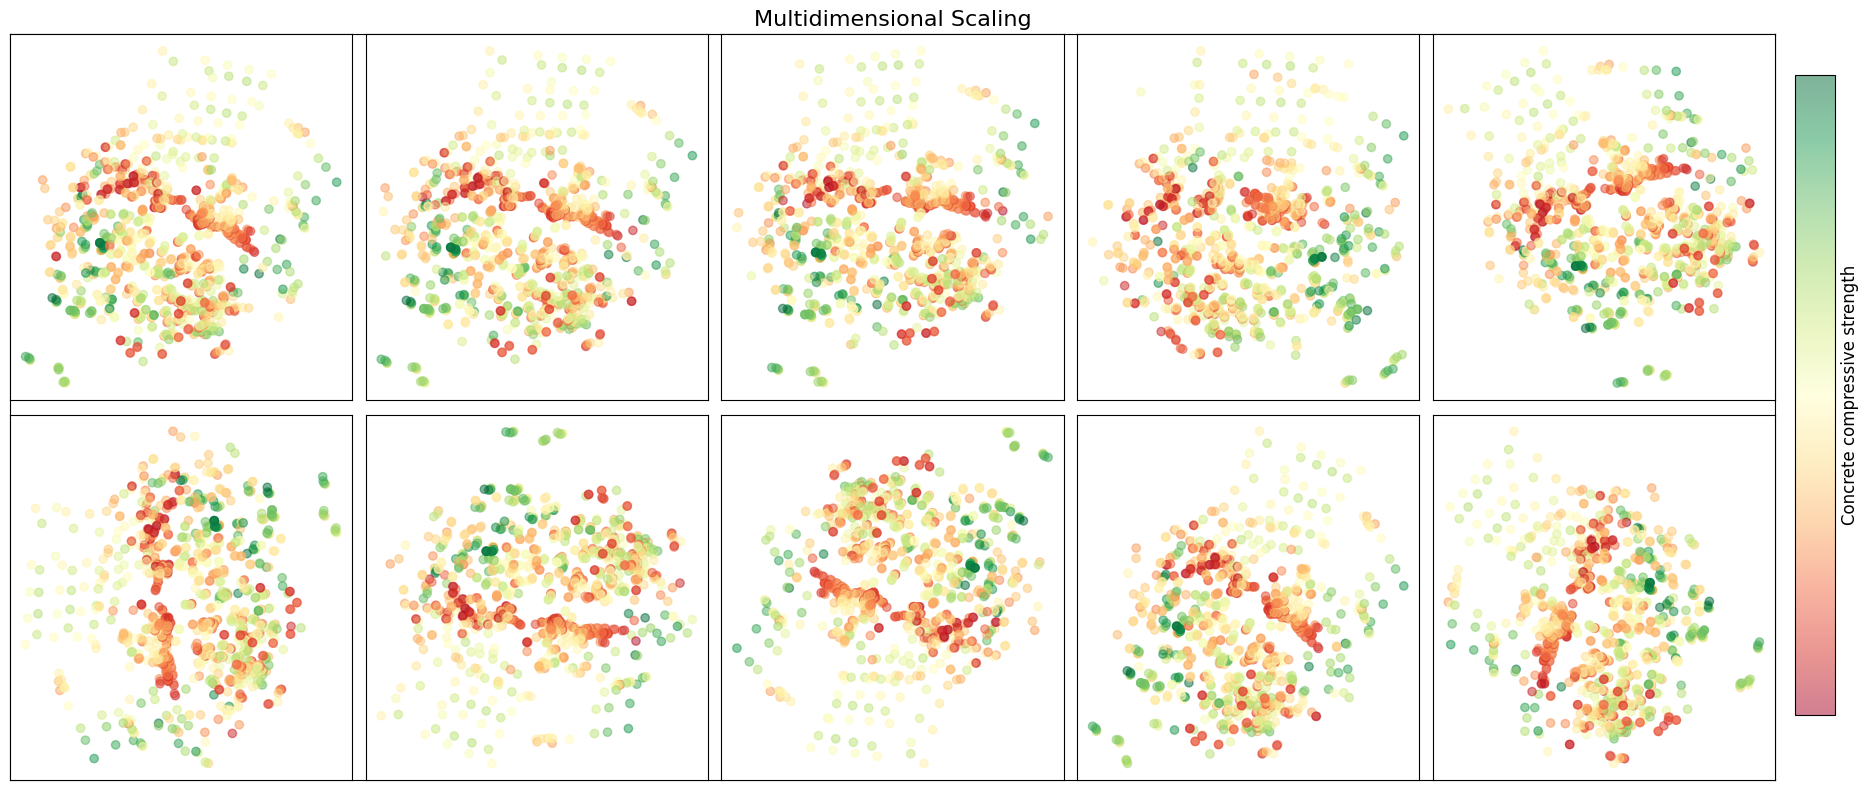

In [19]:
mds2 = perform_mds(dataset, normalize=True, runs=10)